In [1]:
date = input()

2020-02-15


In [2]:
import antpodTest as apd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn import cluster

PROJ: proj_create_from_database: Cannot find proj.db


In [3]:
userID = "APX00000" #kanchi
mapConfig = "XX"
sensor = ["L2A", "L1C"]
antpodProduct =  "VXX"
VXXProducts =['NDVI', 'SAVI', 'AVI', 'EVI', 'ARVI', 'GNDVI', 'NDCI', 'NPCRI', 'PSRI', 'BSI', 'NDMI', 'NDWI', 'SI']
files = apd.rasterCaller(userID, mapConfig, sensor, antpodProduct)
meta = apd.openRaster(files, antpodProduct)
list_date = apd.extractDates(meta)
dataset = meta[date]
geodf = apd.readShapefile(userID)
geodf = apd.setGeoDFCRS(geodf, epsg=4326)
geodf = apd.fillMeanIndexValues(dataset, geodf, VXXProducts)
var = ['meanNDVI','meanSAVI', 'meanEVI', 'meanARVI', 'meanGNDVI', 'meanNDCI', 'meanNPCRI', 'meanPSRI', 'meanBSI', 'meanNDMI', 'meanNDWI']
col = ['geometry'] + var
test = geodf[col]
test = test.dropna()
test

C:\Users\prkaa\anaconda3\envs\test\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\prkaa\anaconda3\envs\test\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


,geometry,meanNDVI,meanSAVI,meanEVI,meanARVI,meanGNDVI,meanNDCI,meanNPCRI,meanPSRI,meanBSI,meanNDMI,meanNDWI
0,"POLYGON ((80.06210 12.81309, 80.06210 12.81279...",0.492993,0.703905,1.233707,0.488134,0.515268,0.200521,0.205553,0.141246,0.033987,0.015729,-0.515268
1,"POLYGON ((80.06160 12.81279, 80.06210 12.81279...",0.589033,0.841029,1.738934,0.586490,0.563443,0.269411,0.136453,0.081184,-0.034794,0.076798,-0.563443
2,"POLYGON ((80.06160 12.81229, 80.06210 12.81229...",0.631944,0.902298,1.954054,0.630295,0.586640,0.302181,0.109448,0.057694,-0.073387,0.114867,-0.586640
3,"POLYGON ((80.06160 12.81179, 80.06210 12.81179...",0.588601,0.840416,1.750894,0.585967,0.556024,0.284428,0.132312,0.080484,-0.096166,0.158166,-0.556024
4,"POLYGON ((80.06160 12.81129, 80.06210 12.81129...",0.587040,0.838188,1.678725,0.584352,0.557508,0.277806,0.146841,0.086279,-0.106744,0.175552,-0.557508
...,...,...,...,...,...,...,...,...,...,...,...,...
889,"POLYGON ((80.07660 12.82029, 80.07703 12.82029...",0.415190,0.592817,-0.299412,0.415279,0.393683,0.131478,-0.004100,-0.023740,-0.006190,0.003358,-0.393683
890,"POLYGON ((80.07660 12.81979, 80.07700 12.81979...",0.327740,0.467963,0.965590,0.320943,0.364626,0.119828,0.160731,0.165948,0.063532,-0.021165,-0.364626
891,"POLYGON ((80.07660 12.81929, 80.07697 12.81929...",0.326507,0.466198,0.952853,0.318921,0.377797,0.138811,0.174560,0.174670,0.075465,-0.032228,-0.377797
892,"POLYGON ((80.07660 12.81879, 80.07694 12.81879...",0.476510,0.680372,1.631267,0.473338,0.449611,0.214993,0.108607,0.084893,-0.008796,0.046030,-0.449611


In [4]:
test.describe()

,meanNDVI,meanSAVI,meanEVI,meanARVI,meanGNDVI,meanNDCI,meanNPCRI,meanPSRI,meanBSI,meanNDMI,meanNDWI
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,0.594800,0.849265,2.034341,0.592286,0.544863,0.272480,0.069817,0.062390,-0.140660,0.194185,-0.544863
std,0.162041,0.231366,1.939951,0.164799,0.110128,0.089682,0.094768,0.076833,0.151390,0.157086,0.110128
min,0.126412,0.180495,-50.112316,0.114988,0.005360,0.021803,-0.094998,-0.114258,-0.390112,-0.131526,-0.762716
25%,0.468078,0.668328,1.447258,0.462602,0.464102,0.203358,-0.019208,-0.006097,-0.287530,0.045702,-0.641542
50%,0.616922,0.880867,2.156928,0.615109,0.556976,0.276677,0.065403,0.044448,-0.155533,0.209915,-0.556976
75%,0.743867,1.062100,2.853894,0.744050,0.641542,0.345361,0.145483,0.113469,-0.000485,0.346808,-0.464102
max,0.862567,1.231631,4.282616,0.862715,0.762716,0.472079,0.360416,0.384477,0.168488,0.439590,-0.005360


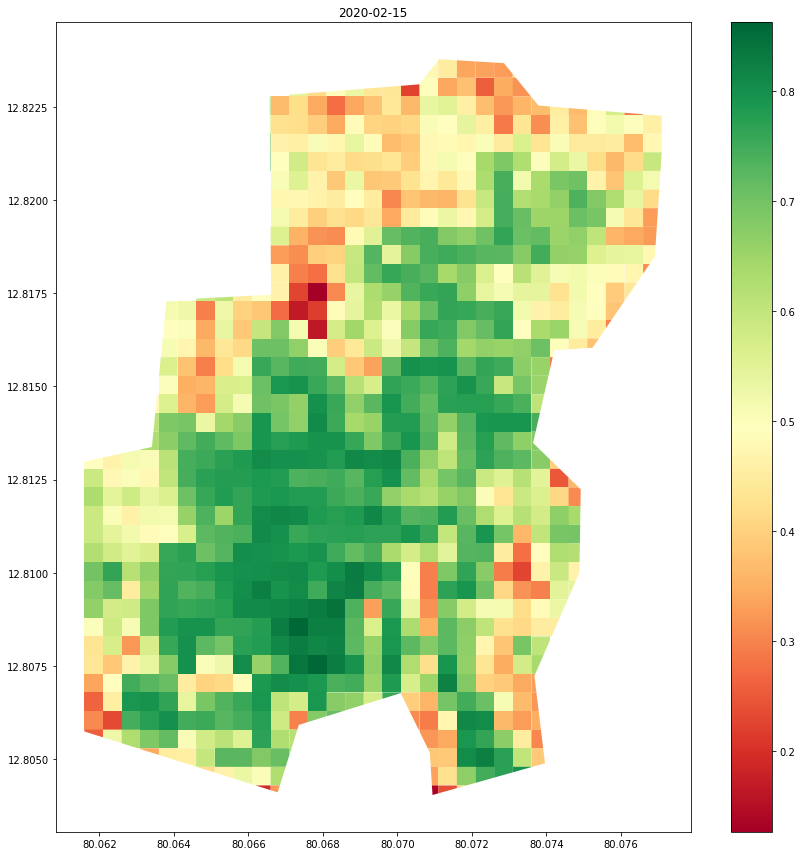

In [5]:
test.plot('meanNDVI',figsize = (12,12), cmap = 'RdYlGn',  legend = True)
#test.boundary.plot(ax=plt.gca(),color='k')
plt.title(date)
plt.tight_layout()

In [6]:
kmeans = cluster.KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [12]:
c = 'meanNDVI'
kcls = kmeans.fit(test[c])
kcls.labels_

ValueError: Expected 2D array, got 1D array instead:
array=[0.4929935  0.58903306 0.63194359 0.58860052 0.58704007 0.6212579
 0.70086874 0.68043581 0.66364182 0.50275045 0.43324556 0.4374583
 0.3375877  0.26410901 0.30713294 0.25750784 0.46440355 0.48000647
 0.54442856 0.50410919 0.54509146 0.57879684 0.76391469 0.71388253
 0.57537575 0.58602172 0.57114712 0.38613066 0.49321263 0.45699746
 0.23046674 0.52817215 0.51594134 0.50116318 0.58171379 0.46269469
 0.51864886 0.54953371 0.61683553 0.44933397 0.5835743  0.51064184
 0.32447812 0.46456388 0.74812533 0.79005222 0.74581385 0.62695705
 0.48279273 0.61208594 0.63039868 0.50784485 0.47990269 0.53659766
 0.51865866 0.48565322 0.57096301 0.6679247  0.64924285 0.6865067
 0.68667848 0.57185882 0.53851217 0.72937474 0.79561606 0.77537659
 0.68431079 0.34354523 0.51551397 0.49232073 0.50890016 0.56449237
 0.50146799 0.56018126 0.68580713 0.67232212 0.61039432 0.60106322
 0.56130312 0.51596762 0.49598786 0.7601177  0.76428631 0.76504596
 0.76503167 0.78201752 0.75923683 0.67667925 0.71067361 0.76562476
 0.79654114 0.71693682 0.45110349 0.52658949 0.50300298 0.46936516
 0.37816018 0.34849269 0.35732917 0.69496831 0.72094439 0.74749346
 0.74521228 0.70617152 0.66077586 0.56850657 0.77209256 0.76552545
 0.73340819 0.75924994 0.79568251 0.79737146 0.79814296 0.45309604
 0.53928592 0.74963128 0.50745925 0.45609573 0.58699298 0.294481
 0.34443746 0.36331034 0.29341929 0.35771204 0.32998392 0.53360636
 0.75032307 0.75487141 0.77087197 0.75947342 0.73710393 0.72171287
 0.70689812 0.77571704 0.7468632  0.76752303 0.79465192 0.72198627
 0.50544321 0.40379404 0.69123683 0.75372725 0.58063485 0.59815586
 0.41602549 0.60821226 0.52733734 0.53716268 0.43806049 0.41947179
 0.56864854 0.57388578 0.6412876  0.72035769 0.77233667 0.7774435
 0.7814363  0.65071389 0.73506785 0.73185251 0.79319207 0.78246242
 0.77610591 0.76439056 0.69668688 0.52329151 0.41374236 0.73463388
 0.72829306 0.61208854 0.72639234 0.46837298 0.45169152 0.40094649
 0.38793185 0.41309997 0.51552874 0.56552663 0.5137522  0.67326084
 0.68960273 0.78315527 0.77803035 0.763753   0.76475771 0.73924334
 0.8030703  0.79789584 0.80331356 0.80840244 0.76503223 0.77265133
 0.8058228  0.48385214 0.75621493 0.74472355 0.55738806 0.72604897
 0.53210211 0.62589407 0.55624321 0.68096653 0.72380132 0.49422411
 0.38375339 0.59794612 0.70634848 0.75702336 0.70858203 0.70234898
 0.79332507 0.79117706 0.80787469 0.78642702 0.7831736  0.80566338
 0.80805219 0.79880348 0.80009308 0.82755119 0.80861098 0.77808182
 0.78116899 0.660139   0.78752371 0.78887922 0.77362298 0.76785239
 0.68153373 0.50358607 0.19059705 0.36673777 0.4280526  0.46471217
 0.49534298 0.50723708 0.47148899 0.51715821 0.55777165 0.33036633
 0.460497   0.46827937 0.27217552 0.68252439 0.70441427 0.7281563
 0.78903606 0.6924064  0.69838288 0.77356408 0.79670099 0.78111658
 0.78868577 0.81571089 0.79666768 0.79449254 0.80697369 0.79608903
 0.81524405 0.82987432 0.8119436  0.73521496 0.80619729 0.60633314
 0.58383648 0.62468278 0.71106913 0.6296035  0.31992676 0.54598213
 0.41994165 0.42212752 0.45802392 0.58008558 0.55676438 0.47518068
 0.45043151 0.35556729 0.31193256 0.29553158 0.22656231 0.16936178
 0.51692125 0.66574814 0.75286496 0.79424236 0.66293947 0.6663518
 0.78410145 0.7989555  0.73738894 0.78190553 0.80958745 0.75803842
 0.78770451 0.81022626 0.80688721 0.82005246 0.86256665 0.83003813
 0.83993531 0.79783552 0.57389379 0.29747415 0.61656909 0.65125916
 0.41512767 0.34373484 0.39412664 0.50777554 0.43206916 0.46588984
 0.46836766 0.39801226 0.31877078 0.39952057 0.27739998 0.12641198
 0.2176414  0.16513978 0.50321758 0.74852387 0.75817596 0.79694789
 0.8105158  0.79508991 0.79464195 0.74226427 0.77964552 0.78405878
 0.77054147 0.79373471 0.78485069 0.7532552  0.83250769 0.82634147
 0.81373755 0.8620486  0.7873067  0.78852238 0.68004598 0.48791072
 0.27509812 0.34310402 0.47385065 0.45103909 0.3857754  0.45135773
 0.42765392 0.30838215 0.40371562 0.42821953 0.30486235 0.48745327
 0.57480727 0.39496283 0.57390759 0.7225656  0.7583285  0.75344926
 0.79515615 0.78161031 0.75122024 0.75412973 0.77395123 0.77291048
 0.75100654 0.80437751 0.81701638 0.84390339 0.82537569 0.81943269
 0.8295909  0.74025972 0.67450405 0.71507354 0.5300536  0.34121818
 0.48380856 0.54015087 0.41611473 0.53271592 0.49179718 0.41335603
 0.48230462 0.59457366 0.59906617 0.53728795 0.54267816 0.6466298
 0.44151395 0.38758822 0.6156077  0.66671761 0.63952181 0.75992199
 0.811378   0.7291532  0.7401594  0.78306603 0.77543194 0.71682003
 0.8315667  0.83004117 0.73636135 0.72562626 0.72171195 0.79570513
 0.74904877 0.66454769 0.43950003 0.37818456 0.4053764  0.4879004
 0.42223174 0.38435259 0.45017373 0.4375186  0.55312507 0.73142729
 0.71624662 0.63099308 0.62214533 0.55864835 0.58865382 0.33558501
 0.57172937 0.72721262 0.65728739 0.6858735  0.80739687 0.77434502
 0.75853847 0.81565674 0.76808475 0.74381342 0.81034901 0.74550123
 0.33292175 0.56543132 0.65955362 0.66942272 0.65494687 0.57270608
 0.43769782 0.44092602 0.40023255 0.36810184 0.4352774  0.38965509
 0.30444232 0.34377916 0.71532776 0.54615424 0.75957755 0.66039279
 0.53359172 0.50247777 0.52358005 0.72073465 0.76515708 0.79312199
 0.77874078 0.75482965 0.81213721 0.79841836 0.66634881 0.77671411
 0.76814401 0.63265048 0.77409657 0.72319532 0.7584154  0.78509952
 0.78959518 0.81308391 0.78285858 0.75690008 0.22407062 0.36450009
 0.41095496 0.3880345  0.39567154 0.42887008 0.38191574 0.44365934
 0.7354464  0.67583349 0.74451043 0.73446934 0.63847025 0.67754244
 0.59650322 0.79643395 0.75494615 0.74840932 0.78034262 0.79178253
 0.73912718 0.71762343 0.63398489 0.73295387 0.79102251 0.57220874
 0.49908396 0.48639021 0.53659437 0.63177869 0.72368384 0.62738576
 0.57007176 0.39410542 0.30923473 0.4751975  0.49998454 0.53702736
 0.50867008 0.47894476 0.47999831 0.46978055 0.36448871 0.48556549
 0.74200224 0.74378347 0.73025292 0.75736421 0.7124716  0.76084599
 0.70189385 0.79292523 0.73591876 0.71706074 0.72314642 0.73384579
 0.66456576 0.6335534  0.6179534  0.73628401 0.75959744 0.62697341
 0.29533727 0.29383875 0.31370532 0.352794   0.68021251 0.42196527
 0.65009518 0.35775767 0.29147634 0.31924976 0.38489133 0.33427601
 0.13479811 0.45290426 0.34138504 0.55004426 0.49291885 0.48208728
 0.51557287 0.44093893 0.35658337 0.53261334 0.6821275  0.75134345
 0.63969051 0.76418475 0.76202351 0.7505801  0.73831308 0.79574243
 0.76874397 0.77318413 0.66409572 0.58104153 0.60900872 0.69824387
 0.65971564 0.78185572 0.5995942  0.54795161 0.68494848 0.76959596
 0.67657425 0.72304114 0.72207563 0.79327294 0.82156749 0.69673282
 0.47185338 0.34262536 0.39067661 0.42764571 0.23620955 0.33814716
 0.37650882 0.45924712 0.54276718 0.47222081 0.48886314 0.47810597
 0.43099425 0.47597819 0.66430719 0.73902929 0.67715877 0.66833836
 0.75967189 0.68294878 0.64239254 0.725329   0.79401176 0.77629708
 0.7327787  0.72458188 0.71600434 0.72915861 0.6833151  0.71300372
 0.72850948 0.73074046 0.76548508 0.79076811 0.5773741  0.67188722
 0.66788171 0.66308845 0.68413273 0.7499056  0.81091809 0.78877557
 0.80772338 0.66764496 0.40698293 0.33547572 0.25653613 0.37182522
 0.45517794 0.50530963 0.639703   0.62982174 0.59413786 0.57423331
 0.70396108 0.72810516 0.56421093 0.53813441 0.7444656  0.71412337
 0.66133602 0.76193189 0.75871519 0.77483999 0.78864315 0.7746172
 0.76801178 0.58696827 0.50515298 0.6277673  0.79263946 0.73484483
 0.67501005 0.70558759 0.51285189 0.60437775 0.4701865  0.43694046
 0.40032699 0.70843602 0.80754447 0.76449165 0.82788157 0.74953919
 0.32888714 0.34658111 0.32337225 0.28812468 0.44370258 0.68643751
 0.7428897  0.74629714 0.74485866 0.7619754  0.72708375 0.49472278
 0.51432199 0.75653903 0.76470537 0.65687078 0.75250511 0.59297913
 0.76052857 0.793452   0.72102146 0.73813891 0.55650871 0.43616679
 0.55978015 0.69821672 0.45384988 0.29188736 0.41016726 0.51685605
 0.42583571 0.37994416 0.345739   0.38904525 0.51033269 0.36471102
 0.67081725 0.77081363 0.77314421 0.41296061 0.31639081 0.35673287
 0.43576891 0.5648376  0.62530733 0.52010932 0.62232623 0.71195016
 0.70892839 0.67729174 0.61387873 0.54125223 0.51869239 0.4970015
 0.66588755 0.67194752 0.6943191  0.73955665 0.79074904 0.66754756
 0.72428327 0.61692158 0.58671331 0.61693805 0.36115717 0.27709407
 0.22458476 0.31710618 0.41891077 0.4130827  0.69441005 0.57514926
 0.34461977 0.36619845 0.33029231 0.4511789  0.60212094 0.79468808
 0.36860665 0.31172395 0.43631269 0.50270724 0.6326591  0.63652073
 0.65097562 0.7164369  0.75006746 0.55243305 0.54136879 0.46582714
 0.63318779 0.7062955  0.65722345 0.65301402 0.60879383 0.74391963
 0.67718664 0.67305582 0.54672922 0.56342542 0.57740249 0.60107047
 0.49163557 0.467876   0.29850866 0.48526628 0.45181559 0.60414463
 0.63766993 0.33342515 0.31995644 0.35001521 0.30262055 0.39003483
 0.45040926 0.4574861  0.50840198 0.57388165 0.69007804 0.66185974
 0.65054379 0.65449374 0.66161187 0.51119581 0.42970262 0.44978417
 0.65350759 0.49933474 0.28917315 0.39953793 0.24950075 0.40925759
 0.6695695  0.69340981 0.62794473 0.58973951 0.5480082  0.53174179
 0.44883158 0.36746226 0.37543388 0.44325508 0.53101482 0.70166132
 0.73617574 0.70878636 0.66527583 0.65957749 0.51972073 0.51910617
 0.51445334 0.51071945 0.45068576 0.36401897 0.30482078 0.63731822
 0.69856656 0.62004183 0.46688523 0.54223434 0.48422215 0.4975995
 0.44506258 0.41909018 0.46348566 0.68220718 0.69391482 0.60413399
 0.55797673 0.50287663 0.4920248  0.49687474 0.45094625 0.37907722
 0.57292885 0.51784061 0.4533409  0.36449651 0.38109495 0.62729875
 0.51418231 0.35902741 0.54183305 0.48776387 0.39113576 0.37982779
 0.30182176 0.28963663 0.49931526 0.37064822 0.41545666 0.55926051
 0.53764965 0.43765653 0.34357792 0.53885419 0.47307102 0.43829776
 0.4595698  0.4756814  0.59250756 0.51683686 0.41518973 0.32773972
 0.32650743 0.47650973 0.30829794].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
test['cluster'] = kcls.labels_
test.head()

,geometry,meanNDVI,meanSAVI,meanEVI,meanARVI,meanGNDVI,meanNDCI,meanNPCRI,meanPSRI,meanBSI,meanNDMI,meanNDWI,cluster
0,"POLYGON ((80.06210 12.81309, 80.06210 12.81279...",0.492993,0.703905,1.233707,0.488134,0.515268,0.200521,0.205553,0.141246,0.033987,0.015729,-0.515268,2
1,"POLYGON ((80.06160 12.81279, 80.06210 12.81279...",0.589033,0.841029,1.738934,0.586490,0.563443,0.269411,0.136453,0.081184,-0.034794,0.076798,-0.563443,3
2,"POLYGON ((80.06160 12.81229, 80.06210 12.81229...",0.631944,0.902298,1.954054,0.630295,0.586640,0.302181,0.109448,0.057694,-0.073387,0.114867,-0.586640,3
3,"POLYGON ((80.06160 12.81179, 80.06210 12.81179...",0.588601,0.840416,1.750894,0.585967,0.556024,0.284428,0.132312,0.080484,-0.096166,0.158166,-0.556024,3
4,"POLYGON ((80.06160 12.81129, 80.06210 12.81129...",0.587040,0.838188,1.678725,0.584352,0.557508,0.277806,0.146841,0.086279,-0.106744,0.175552,-0.557508,3


C:\Users\prkaa\anaconda3\envs\test\lib\site-packages\geopandas\plotting.py:463: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


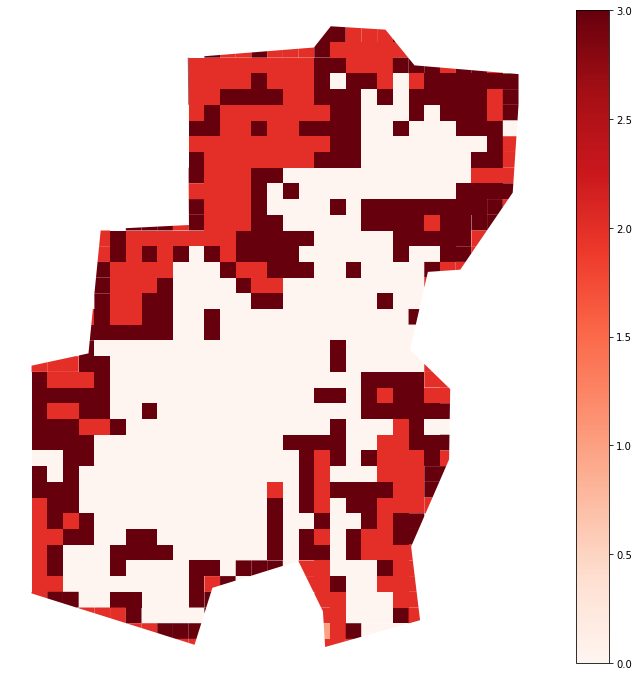

In [14]:
#health = ['bad','ok','good','very good']
f, ax = plt.subplots(1, figsize=(12, 12))
test.plot(column='cluster',legend=True,cmap= 'Reds', axes=ax)
ax.set_axis_off()
plt.axis('equal')
#plt.title('Clustering for ' + date)
plt.show()

In [15]:
k5sizes = test.groupby('cluster').size()
k5sizes

cluster
0    396
1      1
2    206
3    276
dtype: int64

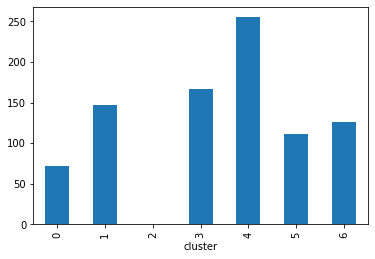

In [125]:
_ = k5sizes.plot(kind='bar')

In [126]:
test = gpd.GeoDataFrame(test, geometry='geometry')
test.to_file('clustering2.shp', driver='ESRI Shapefile')

In [138]:
import pysal as ps
w = ps.lib.weights.Queen.from_dataframe(test)
w

In [139]:
from sklearn.preprocessing import scale
sns.set(style="whitegrid")

In [140]:
km5 = cluster.KMeans(n_clusters=5)

In [141]:
km5cls = km5.fit(test.drop(['geometry'], axis=1).values)

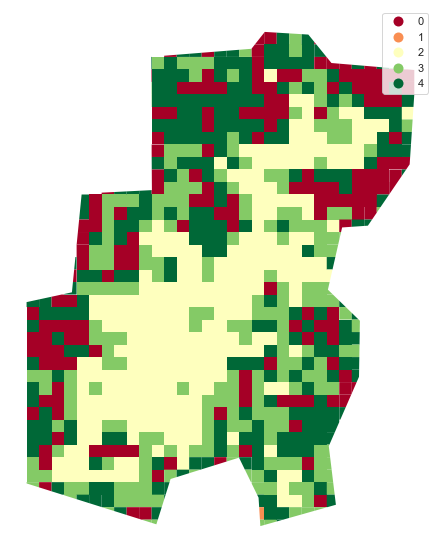

In [150]:
f, ax = plt.subplots(1, figsize=(10, 10))

test.assign(cl=km5cls.labels_).plot(column='cl', categorical=True, legend=True, linewidth= 0, cmap= 'RdYlGn', ax=ax)

ax.set_axis_off()

plt.show()

In [146]:
ndvi = [i for i in test['meanNDVI']]
ndvi

[0.49299349831929595,
 0.5890330625253615,
 0.6319435861304179,
 0.5886005193886609,
 0.5870400669222334,
 0.6212578957112861,
 0.7008687361503719,
 0.6804358109528424,
 0.66364181591835,
 0.5027504467550066,
 0.4332455625797928,
 0.4374582984523939,
 0.33758770112375464,
 0.26410900718387204,
 0.3071329401858861,
 0.25750783650499726,
 0.4644035499639309,
 0.48000647202985947,
 0.5444285557498022,
 0.5041091923328055,
 0.545091458946537,
 0.5787968447473153,
 0.7639146892969371,
 0.7138825338223483,
 0.5753757543222789,
 0.5860217154059744,
 0.5711471221611775,
 0.38613066103502053,
 0.49321263460476744,
 0.45699745519490115,
 0.23046673822686622,
 0.528172145478862,
 0.5159413441148343,
 0.5011631770638179,
 0.5817137866027922,
 0.46269468965689753,
 0.5186488579155948,
 0.5495337059703849,
 0.6168355277739588,
 0.4493339727117777,
 0.5835742960443032,
 0.5106418415124115,
 0.32447812207097093,
 0.46456388477300486,
 0.7481253339242784,
 0.7900522240553313,
 0.7458138487348942,
 0.62

In [147]:
test.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 879 entries, 0 to 893
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geometry   879 non-null    geometry
 1   meanNDVI   879 non-null    float64 
 2   meanSAVI   879 non-null    float64 
 3   meanEVI    879 non-null    float64 
 4   meanARVI   879 non-null    float64 
 5   meanGNDVI  879 non-null    float64 
 6   meanNDCI   879 non-null    float64 
 7   meanNPCRI  879 non-null    float64 
 8   meanPSRI   879 non-null    float64 
 9   meanBSI    879 non-null    float64 
 10  meanNDMI   879 non-null    float64 
 11  meanNDWI   879 non-null    float64 
 12  cluster    879 non-null    int32   
dtypes: float64(11), geometry(1), int32(1)
memory usage: 92.7 KB


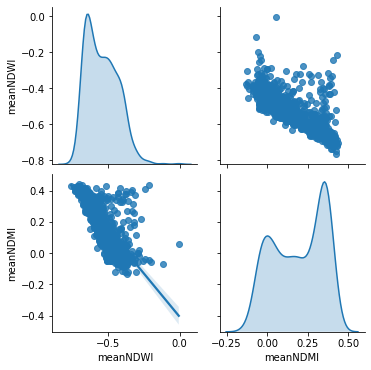

In [18]:
var = ['meanNDVI', 'meanEVI']
var2 = ['meanNDWI', 'meanNDMI']
_ = sns.pairplot(test[var2], kind='reg', diag_kind='kde')